In [1]:
import time
import numpy as np
import matplotlib.pyplot as plt

from scipy.stats import chisquare
from pcg import PCG

# Ejercicio 1
Sobre el generador de números al azar elegido, se pide:
- [x] Implementarlo en función de la especificación del mismo.
- [x] Modificarlo (si aplica) para obtener números al azar entre 0 y 1
- [x] Realizar los gráficos que se consideren adecuados para mostrar las distribuciones de números pseudoaleatorios generados en ambos           casos (explicar que se busca interpretar con cada uno de los gráficos)

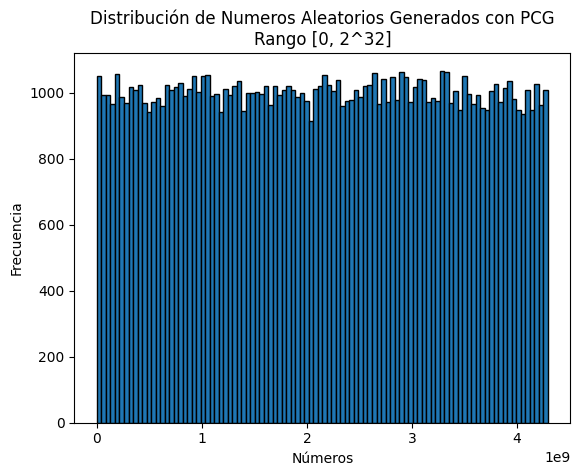

In [3]:
"""
    Histograma:
    
    Se busca comprobar que la frecuencia obtenida por cada número en el eje x sea similar
    de esta forma la probabilidad de obtener cualquier número seguiría una distribución uniforme.
"""
def create_histogram():
    seed = int(time.time() * 1_000)
    pcga = PCG(seed)
    numbers = [pcga.random() for _ in range(100_000)]

    plt.hist(numbers, bins=100, edgecolor="black")
    plt.title("Distribución de Numeros Aleatorios Generados con PCG\nRango [0, 2^32]")
    plt.xlabel("Números")
    plt.ylabel("Frecuencia")
    plt.plot()

create_histogram()

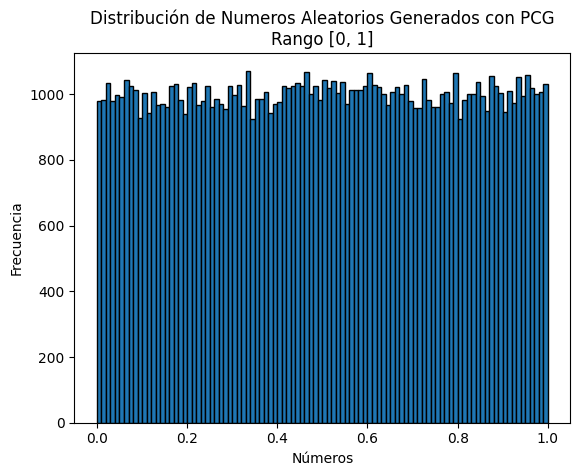

In [4]:
"""
    Histograma:
    
    Se busca comprobar que la frecuencia obtenida por cada número en el eje x sea similar
    de esta forma la probabilidad de obtener cualquier número seguiría una distribución uniforme.
"""
def create_normalized_histogram():
    seed = int(time.time() * 1_000)
    pcga = PCG(seed)
    numbers = [pcga.random_normalized() for _ in range(100_000)]

    plt.hist(numbers, bins=100, edgecolor="black")
    plt.title("Distribución de Numeros Aleatorios Generados con PCG\nRango [0, 1]")
    plt.xlabel("Números")
    plt.ylabel("Frecuencia")
    plt.plot()

create_normalized_histogram()

# Ejercicio 2
En este ejercicio se busca aplicar distintos tests estadísticos vistos en la materia para evaluar tanto el
comportamiento del generador de números pseudoaleatorios elegido como el comportamiento de otro generador
implementado por otro grupo. El grupo al cual le deben evaluar el generador se encuentra en la planilla de grupos en Drive.
Para esta tarea se debe solicitar al equipo asignado uno o más lotes de números generados de los tamaños que se
necesiten. El equipo que haya generado los números debe incluir en la notebook entregada el código utilizado para
generar los mismos.

1. Sobre los generadores implementados en el ejercicio 1:
- [ ] Proponer, y realizar, al menos 3 tests para evaluar su comportamiento.
- [ ] Evaluar e interpretar los resultados de cada test para distintos tamaños de muestras.
2. Sobre el generador implementado por el grupo asignado:
- [ ] Proponer, y realizar, al menos 3 tests para evaluar su comportamiento.
- [ ] Evaluar e interpretar los resultados de cada test para distintos tamaños de muestras.
- [ ] Comparar los resultados obtenidos para este generados con los obtenidos en el punto a)

In [6]:
"""
    Test estadístico 01 para comprobar que el algoritmo sigue una distribución uniforme
    h0: La distribución de la muestra sigue una distribucion uniforme
    h1: La distribución de la muestra no sigue una distribucion uniforme

    - Si rechazamos la hipotesis nula diremos que encontramos suficiente evidencia para
      decir que la misma es falsa con una probabilidad alfa (significancia) de equivocarnos.
    - Si no rechazamos la hipótesis nula diremos que no encontramos suficiente evidencia
      en las muestras para rechazarla y no se puede concluir que la distribución no sea 
      uniforme con ese nivel de significancia.
"""
def chisquare_test(n_numbers, n_bins):
    seed = int(time.time() * 1_000)
    pcga = PCG(seed)
    numbers = [pcga.random_normalized() for _ in range(n_numbers)]
    
    min_val = 0
    max_val = 1
    bin_edges = n_bins + 1
    significance = 0.05
    bins = np.linspace(min_val, max_val, bin_edges)
    counts, _ = np.histogram(numbers, bins=bins)
    expected_counts = [len(numbers) / n_bins] * n_bins
    
    dsquare, p_value = chisquare(counts, f_exp=expected_counts)
    p_value = round(p_value, 2)
    dsquare = round(dsquare, 2)
    
    print(f"P valor: {p_value:.2f}")
    print(f"D cuadrado: {dsquare:.2f}")
    print()
    
    if p_value >= significance:
        print("[*] No hay suficiente evidencia para rechazar la hipótesis nula")
        print(f"[*] P valor = {p_value:.2f} > alfa = {significance:.2f}")
    else:
        print("[*] Se rechaza la hipotesis nula")
        print(f"[*] P valor = {p_value:.2f} < alfa = {significance:.2f}")

def print_result(title, callback):
    border = '*' * 100
    print(border)
    print(title)
    print(border)
    callback()
    print(border)    

def run_chisquare_tests():
    n_numbers_01 = 100_000
    n_bins_01 = 100
    description_01 = f"Test chi cuadrado 01: numero de muestras = {n_numbers_01}, numero de divisiones = {n_bins_01}"
    print_result(description_01, lambda: chisquare_test(n_numbers_01, n_bins_01))
    print()
    
    n_numbers_02 = 10_000
    n_bins_02 = 100
    description_02 = f"Test chi cuadrado 02: numero de muestras = {n_numbers_02}, numero de divisiones = {n_bins_02}"
    print_result(description_02, lambda: chisquare_test(n_numbers_02, n_bins_02))
    print()
    
    n_numbers_03 = 1_000
    n_bins_03 = 100
    description_03 = f"Test chi cuadrado 03: numero de muestras = {n_numbers_03}, numero de divisiones = {n_bins_03}"
    print_result(description_03, lambda: chisquare_test(n_numbers_03, n_bins_03))
    print()
    
    n_numbers_04 = 100
    n_bins_04 = 10
    description_04 = f"Test chi cuadrado 04: numero de muestras = {n_numbers_04}, numero de divisiones = {n_bins_04}"
    print_result(description_04, lambda: chisquare_test(n_numbers_04, n_bins_04))
    print()
    
    n_numbers_05 = 10
    n_bins_05 = 2
    description_05 = f"Test chi cuadrado 05: numero de muestras = {n_numbers_05}, numero de divisiones = {n_bins_05}"
    print_result(description_05, lambda: chisquare_test(n_numbers_05, n_bins_05))
    print()

run_chisquare_tests()

****************************************************************************************************
Test chi cuadrado 01: numero de muestras = 100000, numero de divisiones = 100
****************************************************************************************************
P valor: 0.84
D cuadrado: 84.98

[*] No hay suficiente evidencia para rechazar la hipótesis nula
[*] P valor = 0.84 > alfa = 0.05
****************************************************************************************************

****************************************************************************************************
Test chi cuadrado 02: numero de muestras = 10000, numero de divisiones = 100
****************************************************************************************************
P valor: 0.74
D cuadrado: 89.40

[*] No hay suficiente evidencia para rechazar la hipótesis nula
[*] P valor = 0.74 > alfa = 0.05
*******************************************************************************